In [2]:
import numpy as np
import matplotlib.pyplot as plt
from rcsj_sde.utils import symmetrize, hbar_over_2e
from rcsj_sde.junction import JosephsonJunction
from rcsj_sde.shapiro import run_shapiro

%load_ext autoreload
%autoreload 2

## Junction parameters and Shapiro simulation

In [5]:
Ic = 5.7e-07
R = 9
C = 8.8e-12
T = 0.25

F_ac = 2e9

a = 0
b = 1

jj = JosephsonJunction(Ic=Ic, a=a, b=b, R=R, C=C, T=T)

I_min = -5.5*Ic  # simulation start
I_max = 5.5*Ic  # simulation end
# I_max = 17*Ic; # simulation end

I_points = 501  # number of current values in the range
I_DC_range = np.linspace(I_min, I_max, I_points)  # ramp up only

tau_max = 4_000
tau_points = 40_000

power_points = 1001
powers = np.linspace(-110, -10, power_points)  # power values in dB

dVdI, V = run_shapiro(jj, I_DC_range, F_ac, tau_max, tau_points, powers)


100%|██████████| 1001/1001 [42:45<00:00,  2.56s/it]


Plot the result.

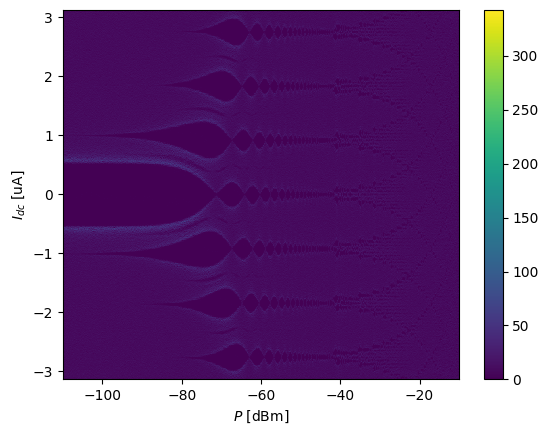

In [6]:
plt.figure()
plt.pcolormesh(powers, I_DC_range[:-1]/1e-6, dVdI.T, vmin=0, rasterized=True, shading="auto")
plt.xlabel(r"$P$ [dBm]")
plt.ylabel(r"$I_{dc}$ [uA]")
plt.colorbar()

# save to file
fname = f"shapiro_a_{a:f}_b_{b:f}"
# np.savez_compressed(fname, Vs=V, dVs=dVdI, f_ac=F_ac, I_DC_range=I_DC_range, powers=powers, a=a, b=b)

Calculate histogram.

Text(0, 0.5, '$V_{dc} ~[\\frac{hf}{2e}]$')

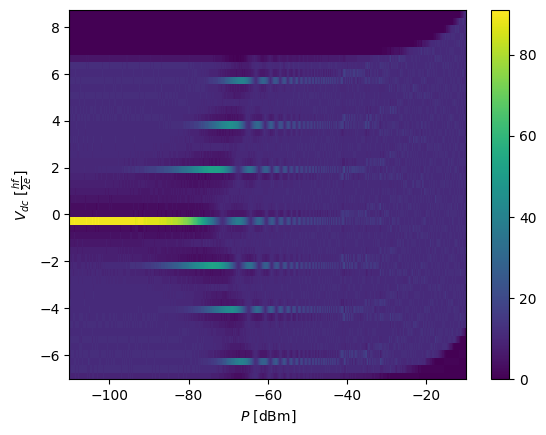

In [7]:
hist_bins = 50
V_scaler = hbar_over_2e*2*np.pi*F_ac
Vhist = np.empty((len(powers), hist_bins))
hist_range = [np.min(V[:]), np.max(V[:])]
edges = np.histogram_bin_edges(Vhist, bins=hist_bins, range=hist_range)

for pi, power in enumerate(powers):
    Vhist[pi,:], _ = np.histogram(V[pi,:], bins=edges)

plt.pcolor(powers, edges[:-1]/V_scaler, Vhist.T)
plt.colorbar()
plt.xlabel(r"$P$ [dBm]")
plt.ylabel(r"$V_{dc} ~[\frac{hf}{2e}]$")
# plt.savefig(f"shapiro_hist_a_{a:f}_b_{b:f}.pdf")

## Symmetric plots

/var/folders/_b/y4_l8xx96yd_n1482vw0pkpc0000gn/T/ipykernel_37943/628771881.py:7: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(powers, I_full/1e-6, dVdI_full.T, vmin=0, rasterized=True, shading="auto")
/var/folders/_b/y4_l8xx96yd_n1482vw0pkpc0000gn/T/ipykernel_37943/628771881.py:17: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(powers, edges_sym/V_scaler, Vhist_sym.T, rasterized=True, shading="auto")


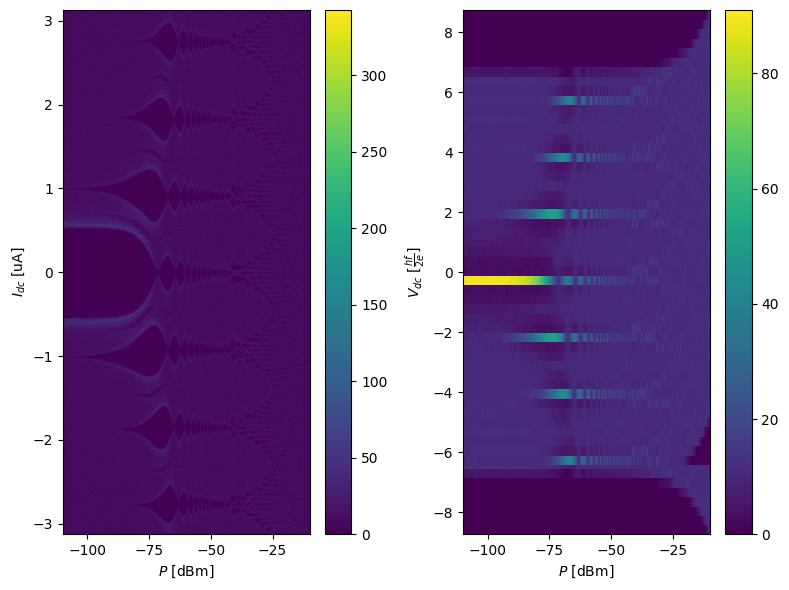

In [8]:
I_full = symmetrize(I_DC_range)
dVdI_full = symmetrize(dVdI)

fig, axs = plt.subplots(ncols=2, figsize=(8,6))

plt.sca(axs[0])
plt.pcolor(powers, I_full/1e-6, dVdI_full.T, vmin=0, rasterized=True, shading="auto")
plt.xlabel(r"$P$ [dBm]")
plt.ylabel(r"$I_{dc}$ [uA]")
plt.colorbar()

edges_sym = symmetrize(edges)
Vhist_sym = symmetrize(Vhist)

plt.sca(axs[1])

plt.pcolor(powers, edges_sym/V_scaler, Vhist_sym.T, rasterized=True, shading="auto")
plt.xlabel(r"$P$ [dBm]")
plt.ylabel(r"$V_{dc} ~[\frac{hf}{2e}]$")
plt.colorbar()

plt.tight_layout()
# plt.savefig(f"shapiro_double_a_{a:f}_b_{b:f}.pdf")

## Save to file

In [23]:
delimiter = ','

header = str(jj)
header += "\n" + f"tau_max = {tau_max:d}, tau_points = {tau_points:d}"
header += "\n" + f"F_ac = {F_ac:e}"

# np.savetxt(fname + "_powers.txt", powers, delimiter=delimiter, header=header)
# np.savetxt(fname + "_I_full.txt", I_full, delimiter=delimiter, header=header)  
# np.savetxt(fname + "_dVdI_full.txt", dVdI_full, delimiter=delimiter, header=header)
# np.savetxt(fname + "_V.txt", V, delimiter=delimiter, header=header)
# np.savetxt(fname + "_edges_sym.txt", edges_sym, delimiter=delimiter, header=header)